In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set()

In [2]:
anime=pd.read_csv('anime.csv')
anime

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [3]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [4]:
anime = pd.read_csv('anime.csv')
anime = anime.drop(columns=['members'])
unknown_count = (anime['episodes'] == 'Unknown').sum()

print("Number of 'Unknown' values in 'episodes' column:", unknown_count)
# Convert 'episodes' column to numeric, coercing errors to NaN
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')

# Calculate the mean of known values (excluding NaN)
mean_episodes = anime['episodes'].mean(skipna=True)

# Replace 'Unknown' values with the mean
anime['episodes'].fillna(mean_episodes, inplace=True)


# Convert the 'episodes' column back to integer type
anime['episodes'] = anime['episodes'].astype('int64')
print(mean_episodes)

Number of 'Unknown' values in 'episodes' column: 340
12.382549774134182


In [5]:
print(anime['episodes'].value_counts())
print(anime['episodes'].unique())
anime.info()
#Replaced unknown episodes with average and changed column type to int64 

episodes
1      5677
12     1156
2      1076
13      572
26      514
       ... 
330       1
291       1
276       1
120       1
125       1
Name: count, Length: 186, dtype: int64
[   1   64   51   24   10  148  110   13  201   25   22   75    4   26
   12   27   43   74   37    2   11   99   39  101   47   50   62   33
  112   23    3   94    6    8   14    7   40   15  203   77  291  120
  102   96   38   79  175  103   70  153   45    5   21   63   52   28
  145   36   69   60  178  114   35   61   34  109   20    9   49  366
   97   48   78  358  155  104  113   54  167  161   42  142   31  373
  220   46  195   17 1787   73  147  127   16   19   98  150   76   53
  124   29  115  224   44   58   93  154   92   67  172   86   30  276
   59   72  330   41  105  128  137   56   55   65  243  193   18  191
  180   91  192   66  182   32  164  100  296  694   95   68  117  151
  130   87  170  119   84  108  156  140  331  305  300  510  200   88
 1471  526  143  726  136 1818  237 142

In [6]:
#combined types into others for convenience
anime['type'].replace(['ONA', 'Music', 'Special'], 'Others', inplace=True)
anime.dropna(subset=['type'], inplace=True) #removed 25 NaN values
print(anime['type'].value_counts())
print(anime['type'].unique())
anime.info()

type
TV        3787
OVA       3311
Others    2823
Movie     2348
Name: count, dtype: int64
['Movie' 'TV' 'OVA' 'Others']
<class 'pandas.core.frame.DataFrame'>
Index: 12269 entries, 0 to 12293
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12269 non-null  int64  
 1   name      12269 non-null  object 
 2   genre     12210 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12269 non-null  int64  
 5   rating    12064 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 671.0+ KB


In [7]:
anime.dropna(subset=['genre'], inplace=True) #removed 59 NaN values
anime = anime[~anime['genre'].str.contains('Hentai|Yuri|Yaoi|Shounen Ai|Shoujo Ai', na=False)] #removed 1355 inappropriate titles
anime
anime.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10914 entries, 0 to 11111
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  10914 non-null  int64  
 1   name      10914 non-null  object 
 2   genre     10914 non-null  object 
 3   type      10914 non-null  object 
 4   episodes  10914 non-null  int64  
 5   rating    10733 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 596.9+ KB


In [8]:
anime.dropna(subset=['rating'], inplace=True) #removed 181 NaN values
print(anime['rating'].value_counts())
print(anime['rating'].unique())
anime.info()
animeclean=anime

rating
6.00    129
7.00     94
6.50     83
6.25     77
5.00     74
       ... 
3.71      1
3.87      1
3.91      1
4.19      1
2.72      1
Name: count, Length: 593, dtype: int64
[ 9.37  9.26  9.25  9.17  9.16  9.15  9.13  9.11  9.1   9.06  9.05  9.04
  8.98  8.93  8.92  8.88  8.84  8.83  8.82  8.81  8.8   8.78  8.77  8.76
  8.75  8.74  8.73  8.72  8.71  8.69  8.68  8.67  8.66  8.65  8.64  8.62
  8.61  8.6   8.59  8.58  8.57  8.56  8.55  8.54  8.53  8.52  8.51  8.5
  8.49  8.48  8.47  8.46  8.45  8.44  8.43  8.42  8.41  8.4   8.39  8.38
  8.37  8.36  8.35  8.34  8.33  8.32  8.31  8.3   8.29  8.28  8.27  8.26
  8.25  8.24  8.23  8.22  8.21  8.2   8.19  8.18  8.17  8.16  8.15  8.14
  8.13  8.12  8.11  8.1   8.09  8.08  8.07  8.06  8.05  8.04  8.03  8.02
  8.01  8.    7.99  7.98  7.97  7.96  7.95  7.94  7.93  7.92  7.91  7.9
  7.89  7.88  7.87  7.86  7.85  7.84  7.83  7.82  7.81  7.8   7.79  7.78
  7.77  7.76  7.75  7.74  7.73  7.72  7.71  7.7   7.69  7.68  7.67  7.66
  7.65  7.64  7.63  7

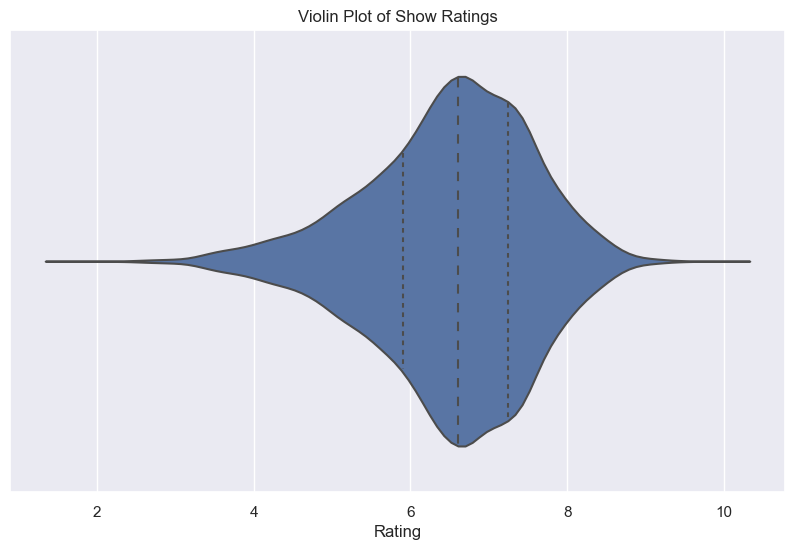

Variance of 'rating': 1.0996281262973215


count    10733.000000
mean         6.504288
std          1.048680
min          1.670000
25%          5.900000
50%          6.610000
75%          7.240000
max         10.000000
Name: rating, dtype: float64

In [9]:
plt.figure(figsize=(10, 6))
sb.violinplot(data=anime, x='rating', inner='quartile')
plt.title('Violin Plot of Show Ratings')
plt.xlabel('Rating')
plt.show()
# Compute variance of 'rating'
rating_variance = np.var(anime['rating'])
print("Variance of 'rating':", rating_variance)
anime['rating'].describe()

Text(0, 0.5, 'Type')

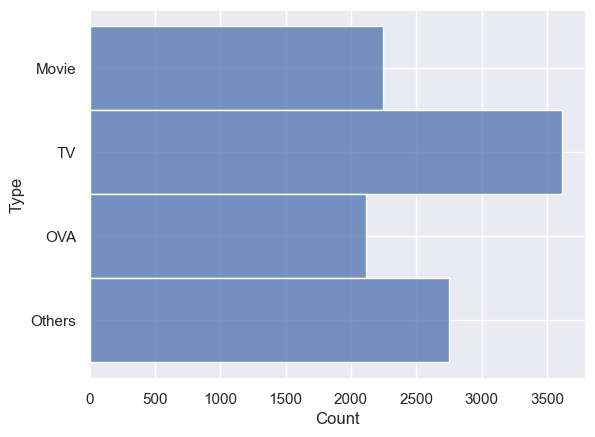

In [10]:
sb.histplot(y = 'type', data = anime)
plt.ylabel('Type')

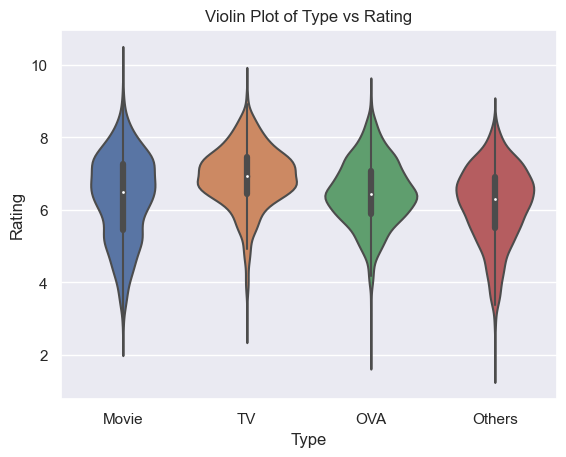

In [11]:
sb.violinplot(data=anime, x='type', y='rating')
plt.xlabel('Type')
plt.ylabel('Rating')
plt.title('Violin Plot of Type vs Rating')
plt.show()

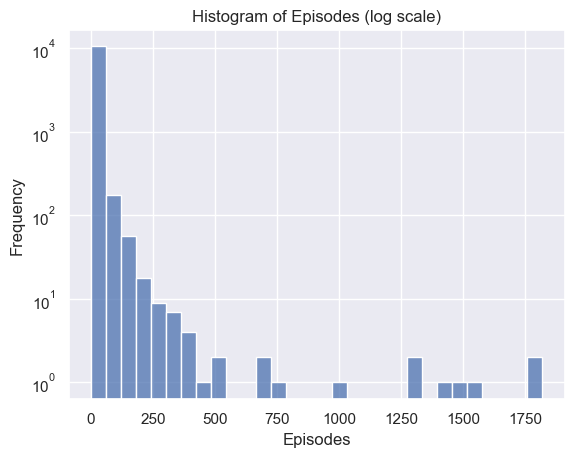

In [12]:
sb.histplot(data=anime, x='episodes', bins=30, log_scale=(False, True))
plt.xlabel('Episodes')
plt.ylabel('Frequency')
plt.title('Histogram of Episodes (log scale)')
plt.show()

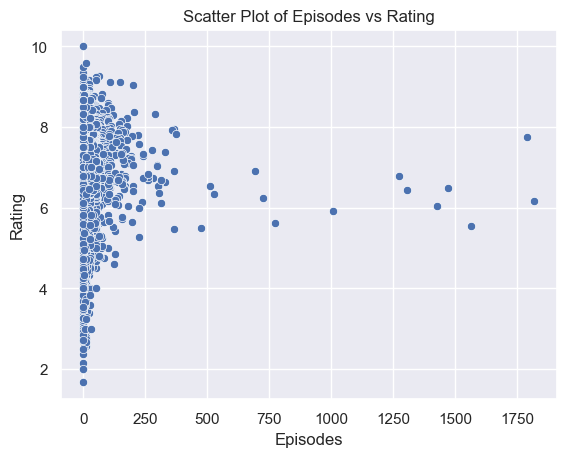

In [13]:
sb.scatterplot(data=anime, x='episodes', y='rating')
plt.xlabel('Episodes')
plt.ylabel('Rating')
plt.title('Scatter Plot of Episodes vs Rating')
plt.show()